Посмотрим на размер данных

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('./laptop_price.csv')
print(df.shape)

(1000, 7)


Расмотрим основные статистические характеристики данных по каждому числовому признаку: число непропущенных значений, среднее, стандартное отклонение, 0.25 и 0.75 квартили.

In [2]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 1000)
df = pd.read_csv('./laptop_price.csv')
df.describe()

,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.750611,15.500000,584.576000,14.056790,3.466919,19604.187963
std,0.731796,10.988665,313.438517,1.705882,0.866541,9406.064880
min,1.511580,4.000000,256.000000,11.012111,2.000560,8570.012950
25%,2.089246,8.000000,256.000000,12.635523,2.717211,10114.012948
50%,2.760885,16.000000,512.000000,14.099643,3.464630,17287.241878
75%,3.362610,32.000000,1000.000000,15.528590,4.212583,31566.214754
max,3.998534,32.000000,1000.000000,16.985737,4.990728,33503.935037


Рассмотрим тепловую карту пропущеных значений 

<Axes: >

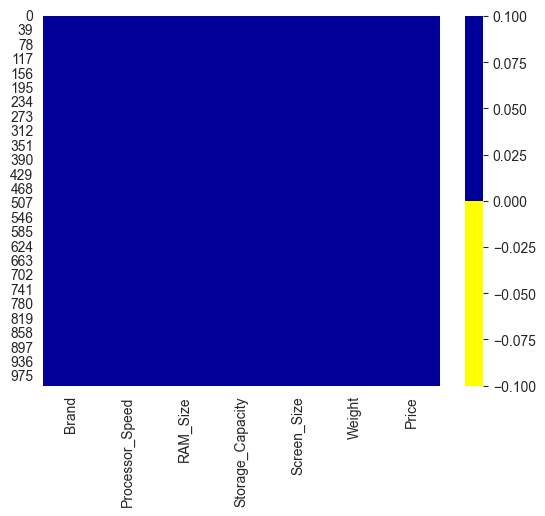

In [9]:
import seaborn as sns
colours = ['#ffff00', '#000099'] 
sns.heatmap(df.isnull(), cmap=sns.color_palette(colours))

In [ ]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Рассмотрим как связаны между собой признаки:
 1 Гистограмма распределения признака, остальные диаграммы рассеяния

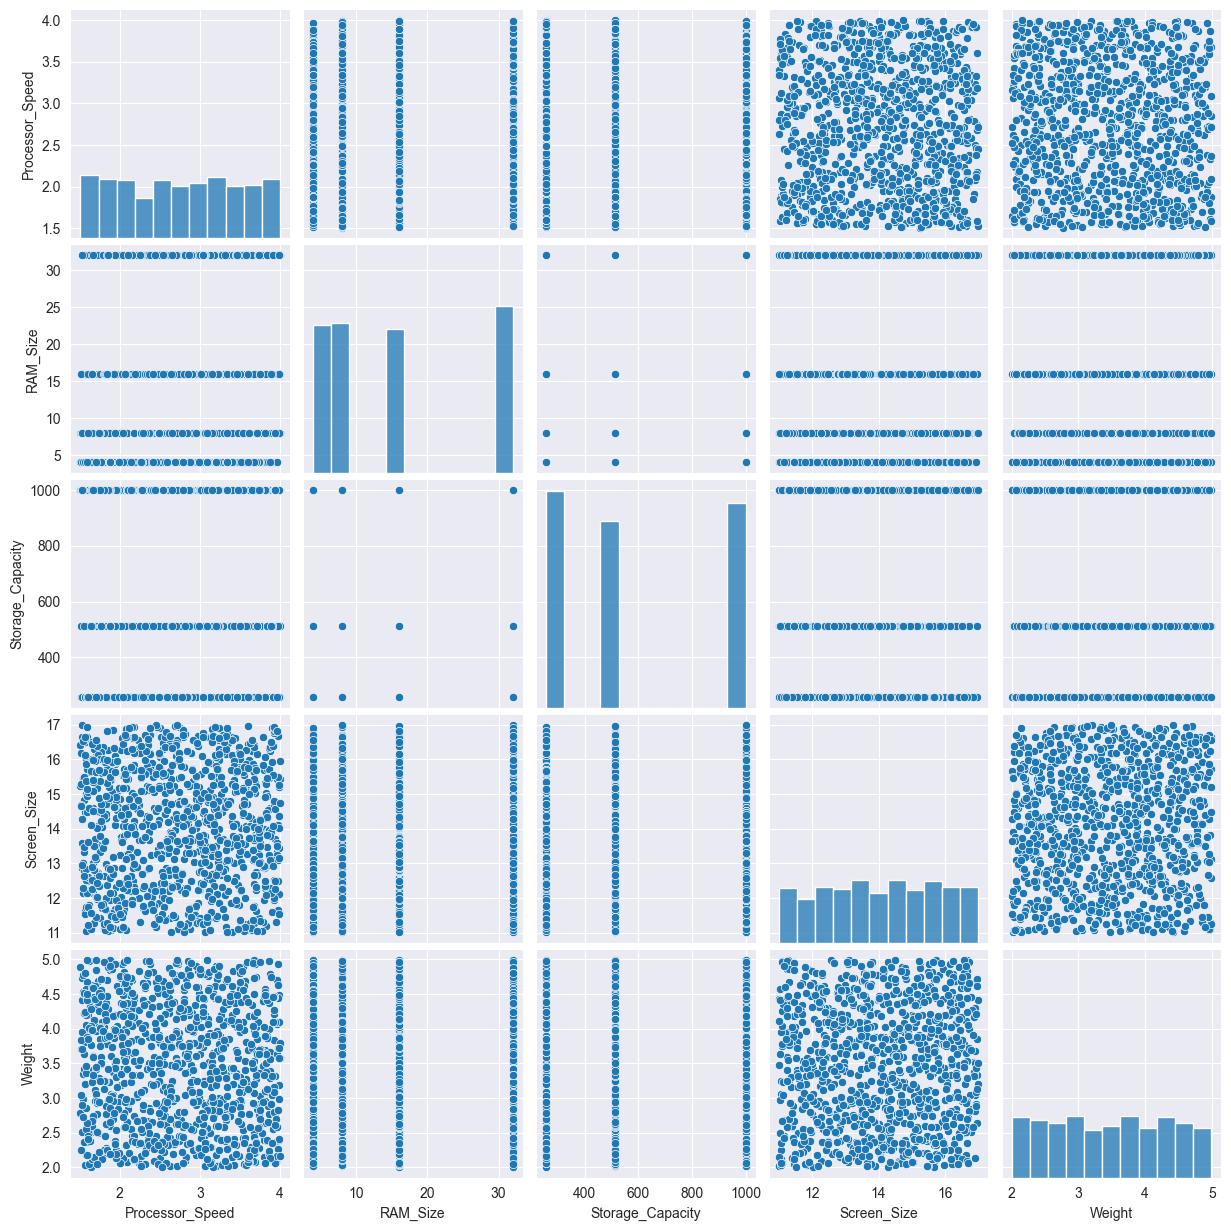

In [12]:
cols = ['Brand', 'Processor_Speed', 'RAM_Size', 'Storage_Capacity', 'Screen_Size', 'Weight', 'Price']
sns_plot = sns.pairplot(df[cols])
sns_plot.savefig('pairplot.png')

Построим корреляционную тепловую матрицу

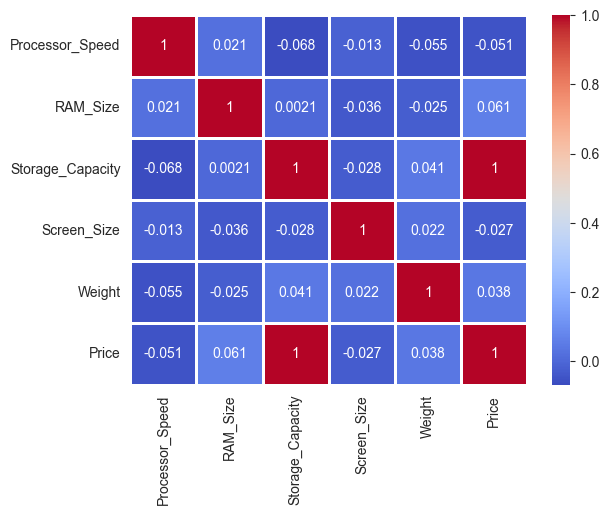

In [7]:
df_numeric = df.drop(columns=['Brand'])

corr_matrix = df_numeric.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, linewidths=1, cbar=True)
plt.show()

Гистограма цены

<Axes: xlabel='Price', ylabel='Count'>

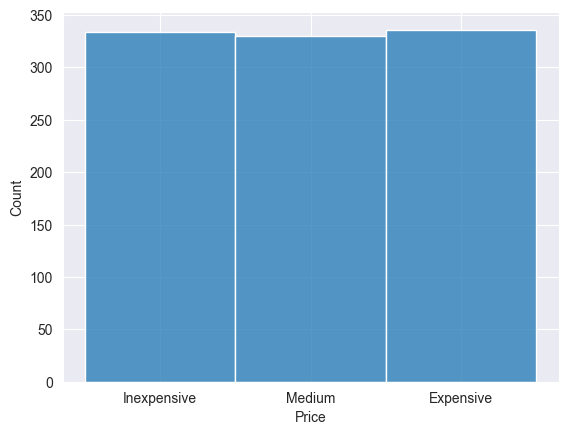

In [10]:
df = pd.read_csv('./laptop_price.csv')
df['Price'] = pd.cut(df["Price"].astype(float),
                            bins=[0, 10750, 29000, float('inf')],
                            labels=["Inexpensive", "Medium", "Expensive"])

sns.histplot(data=df, x='Price', discrete=True)

<Axes: xlabel='Weight', ylabel='Count'>

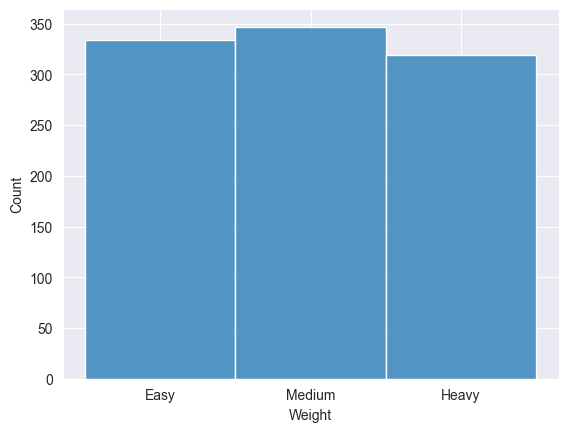

In [42]:
df = pd.read_csv('./laptop_price.csv')
df['Weight'] = pd.cut(df["Weight"].astype(float),
                                 bins=[0.0, 2.95, 4.0, float('inf')],
                                 labels=["Easy", "Medium", "Heavy"])

sns.histplot(data=df, x='Weight', discrete=True)

<Axes: xlabel='Screen_Size', ylabel='Count'>

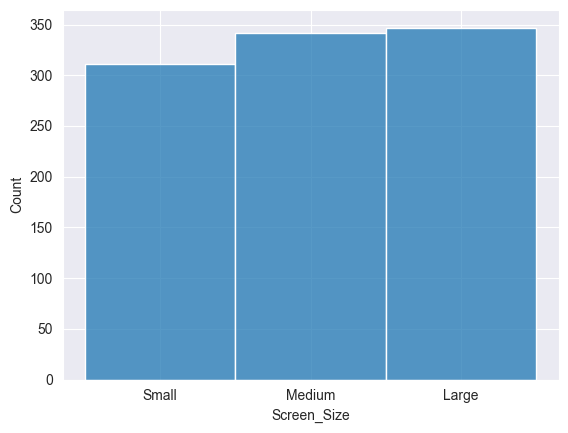

In [50]:
df = pd.read_csv('./laptop_price.csv')
df['Screen_Size'] = pd.cut(df["Screen_Size"].astype(int),
                                      bins=[0, 12, 14, float('inf')],
                                      labels=["Small", "Medium", "Large"])
sns.histplot(data=df, x='Screen_Size', discrete=True)


<Axes: xlabel='Processor_Speed', ylabel='Count'>

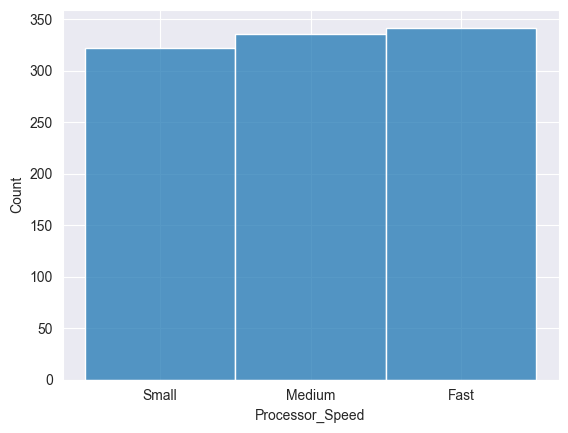

In [65]:
df = pd.read_csv('./laptop_price.csv')
df['Processor_Speed'] = pd.cut(df["Processor_Speed"].astype(float),
                                          bins=[0, 2.3, 3.15, float('inf')],
                                          labels=["Small", "Medium", "Fast"])
sns.histplot(data=df, x='Processor_Speed', discrete=True)

In [66]:
from collections import Counter
from math import log2
import pandas as pd


class GainRation:
    @staticmethod
    def _calculate_entropy(counter: Counter, total_rows: int) -> float:
        total_count = sum(counter.values())
        entropy = 0.0

        for value in counter.values():
            probability = value / total_count
            entropy -= probability * log2(probability)

        return entropy * total_count / total_rows

    @staticmethod
    def _inform_entropy_t(df: pd.DataFrame, target: str) -> float:
        counter = Counter(df[target])
        return GainRation._calculate_entropy(counter, df.shape[0])

    @staticmethod
    def _inform_entropy_a_t(df: pd.DataFrame, attribute: str, target: str) -> float:
        categories = df[attribute].unique()
        total_rows = df.shape[0]
        info_entropy = 0

        for category in categories:
            subset = df[df[attribute] == category]
            counter = Counter(subset[target])
            info_entropy += GainRation._calculate_entropy(counter, total_rows)

        return info_entropy

    @staticmethod
    def gain_ration(df: pd.DataFrame, attribute: str, target: str) -> float:
        inform_gain = GainRation._inform_entropy_t(df, target) - GainRation._inform_entropy_a_t(df, attribute, target)
        split_info = GainRation._inform_entropy_t(df, attribute)
        return inform_gain / split_info